<a href="https://colab.research.google.com/github/pollinations/pollinations/blob/dev/Real_ESRGAN_Inference_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-ESRGAN Inference Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

This is a **Practical Image Restoration Demo** of our paper [''Real-ESRGAN: Training Real-World Blind Super-Resolution with Pure Synthetic Data''](https://arxiv.org/abs/2107.10833).
We extend the powerful ESRGAN to a practical restoration application (namely, Real-ESRGAN), which is trained with pure synthetic data. <br>
The following figure shows some real-life examples.

<img src="https://raw.githubusercontent.com/xinntao/Real-ESRGAN/master/assets/teaser.jpg" width="100%">

We provide a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>

You can also find a **Portable Windows/Linux/MacOS executable files for Intel/AMD/Nvidia GPU.** in our [GitHub repo](https://github.com/xinntao/Real-ESRGAN). <br>
This executable file is **portable** and includes all the binaries and models required. No CUDA or PyTorch environment is needed.<br>
This executable file is based on the wonderful [Tencent/ncnn](https://github.com/Tencent/ncnn) and [realsr-ncnn-vulkan](https://github.com/nihui/realsr-ncnn-vulkan) by [nihui](https://github.com/nihui).

# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [1]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 307, done.
remote: Counting objects: 100% (307/307), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 307 (delta 151), reused 234 (delta 87), pack-reused 0
Receiving objects: 100% (307/307), 3.18 MiB | 8.90 MiB/s, done.
Resolving deltas: 100% (151/151), done.
/content/Real-ESRGAN
     |████████████████████████████████| 136 kB 7.1 MB/s 
     |████████████████████████████████| 5.7 MB 18.8 MB/s 
     |████████████████████████████████| 185 kB 67.8 MB/s 
  Created wheel for basicsr: filename=basicsr-1.3.3.11-py3-none-any.whl size=171451 sha256=11ade274f4280bb505909c45cea6267a2579fb336007d00a4c4cf4256109c590
  Stored in directory: /root/.cache/pip/wheels/6f/04/aa/bc586aa633bd493c3535a6570fcd03782b7a696e2178167da7
Successfully built basicsr
     |████████████████████████████████| 1.1 MB 7.0 MB/s 
     |████████████████████████████████| 177 kB 68.4 MB/s 
  Created wheel for facexlib: filename=facexlib-0.2.0.3-py3-

# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

In [4]:
!ffmpeg -i supprassumo_small.mov  supra%04d.png

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [5]:
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

import glob
for filepath in glob.iglob("supra*.png"):
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

NameError: ignored

# 3. Inference


In [ ]:
# if it is out of memory, try to use the `--tile` option
# We upsample the image with the scale factor X3.5
!python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
# Arguments
# --model_path: the path to the pretrained model
# --input: input folder or image
# --netscale: The scale factor in the network architecture. It should be consistent with the model
# --outscale: Output scale, can be arbitrary scale factore. 

Downloading: "https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth" to /usr/local/lib/python3.7/dist-packages/facexlib/weights/detection_Resnet50_Final.pth

100% 104M/104M [00:01<00:00, 63.2MB/s]
Downloading: "https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth" to /usr/local/lib/python3.7/dist-packages/gfpgan/weights/GFPGANCleanv1-NoCE-C2.pth

100% 332M/332M [00:04<00:00, 74.1MB/s]
Testing 0 supra0001
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
	Tile 1/1
Testing 1 supra0002
	Tile 1/1
Testing 2 supra0003
	Tile 1/1
Testing 3 supra0004
	Tile 1/1
Testing 4 supra00

# 4. Visualization

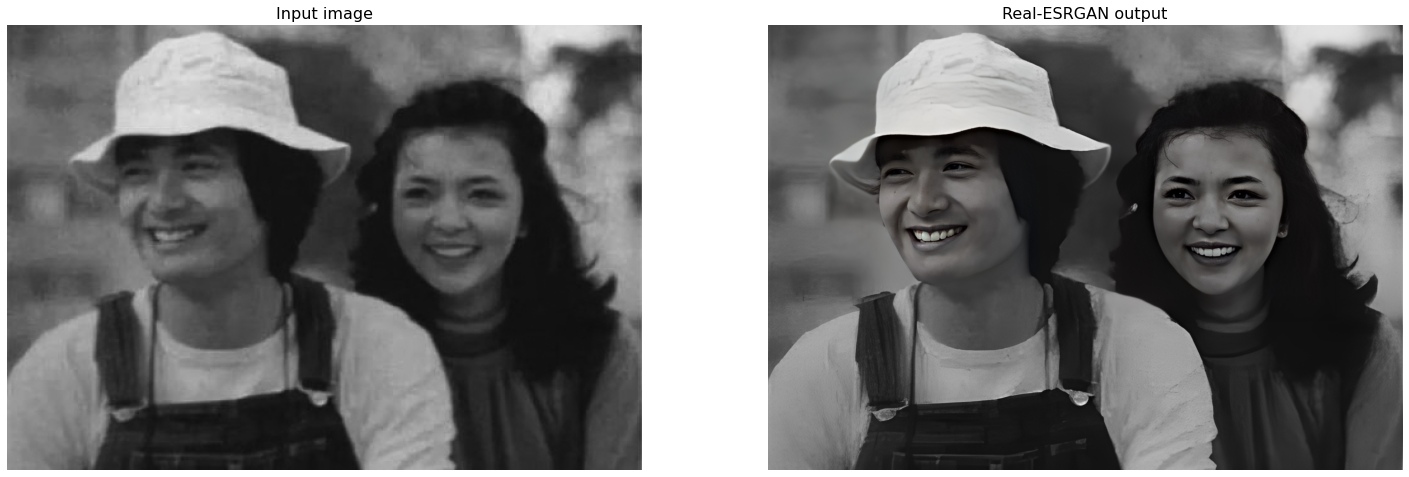

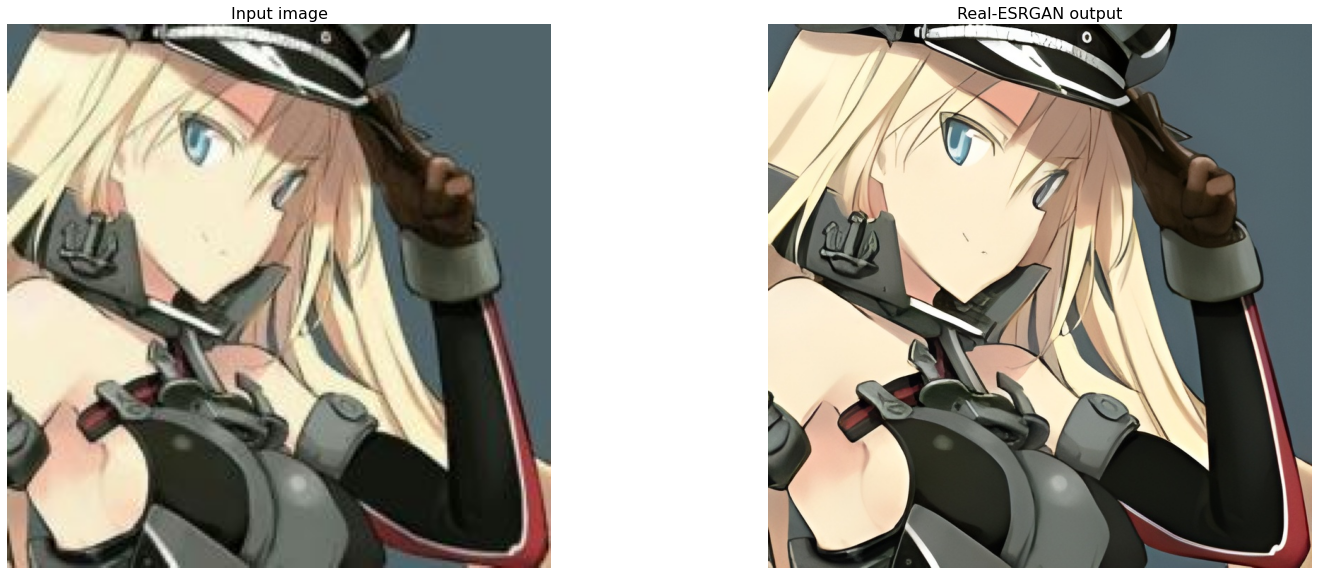

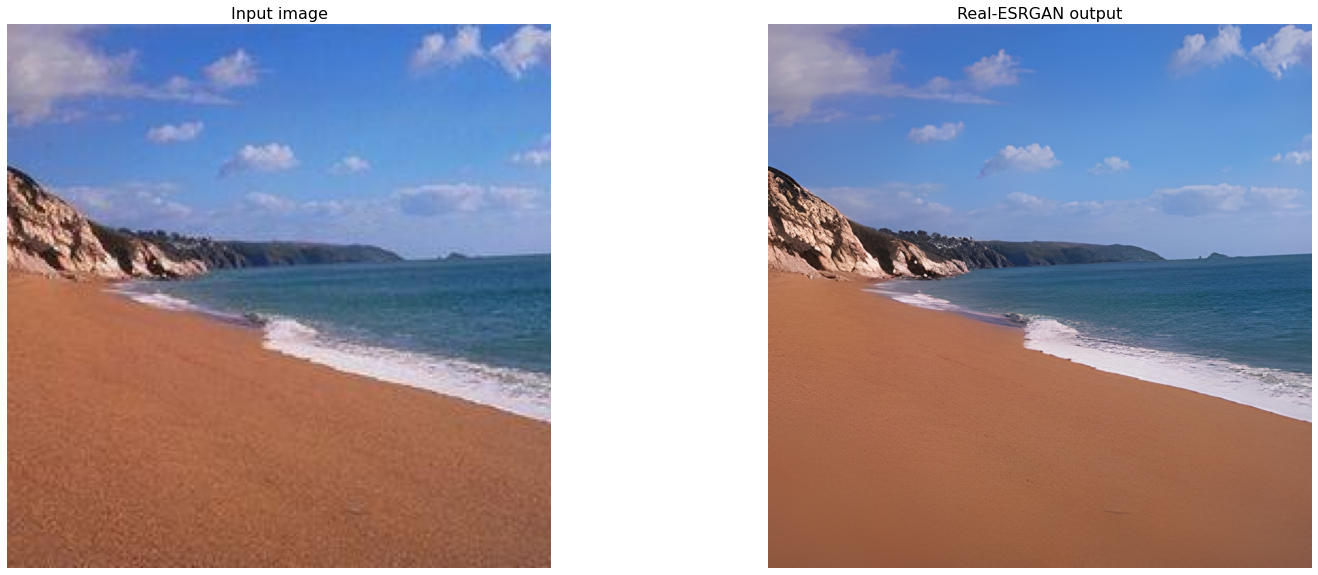

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [ ]:
# Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>